# **Computational Drug Discovery: Decision trees and Regression Models**


---

Here I extend on the work by Chanin Nantasenamat that investigates the association of active molecules and bioactivity of Acetylcholinesterase

Pre-processing steps can be found here: https://github.com/dataprofessor/bioinformatics_freecodecamp/

## **1. Import libraries**

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor


## **2. Load the data set**

In [5]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

## **3. Input features**
The ***Acetylcholinesterase*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [6]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [7]:
Y = df.pIC50
Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
4690    5.612610
4691    5.595166
4692    5.419075
4693    5.460924
4694    5.555955
Name: pIC50, Length: 4695, dtype: float64

### **3.3. Let's examine the data dimension**

In [8]:
X.shape

(4695, 881)

In [9]:
Y.shape

(4695,)

### **3.4. Remove low variance features**

In [54]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=0.16)    
X = selection.fit_transform(X)

In [55]:
X.shape

(4695, 137)

## **4. Data split (80/20 ratio)**

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [23]:
X_train.shape, Y_train.shape

((3756, 137), (3756,))

In [24]:
X_test.shape, Y_test.shape

((939, 137), (939,))

## **5. Building Regression Models**

### **5.1. The LazyRegressor**

In [ ]:
# Defines and builds the lazyclassifier

clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

In [127]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GaussianProcessRegressor,0.87,0.87,0.55,4.16
DecisionTreeRegressor,0.87,0.87,0.55,0.09
ExtraTreeRegressor,0.87,0.87,0.55,0.09
ExtraTreesRegressor,0.87,0.87,0.55,4.21
RandomForestRegressor,0.83,0.84,0.63,3.09
XGBRegressor,0.83,0.84,0.63,0.81
BaggingRegressor,0.82,0.83,0.65,0.40
MLPRegressor,0.80,0.80,0.69,3.14
HistGradientBoostingRegressor,0.68,0.69,0.86,3.58


In [128]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.40,0.49,1.07,0.24
HistGradientBoostingRegressor,0.40,0.48,1.08,0.87
RandomForestRegressor,0.38,0.47,1.09,3.06
SVR,0.37,0.46,1.11,1.95
KNeighborsRegressor,0.36,0.45,1.11,0.05
NuSVR,0.36,0.45,1.11,1.50
BaggingRegressor,0.35,0.44,1.12,0.37
XGBRegressor,0.33,0.43,1.13,1.47
MLPRegressor,0.33,0.43,1.14,3.17


### **5.2. The Gaussian Process Regressor**

In [129]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, DotProduct, WhiteKernel, ConstantKernel as C

In [131]:
use_kernel = C() * RBF(length_scale=100.0, length_scale_bounds=(1e-2, 1e3)) \
+ WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+5))


myGPR = GaussianProcessRegressor(n_restarts_optimizer=5, kernel=use_kernel, normalize_y=True)

# Fit GPR model
myGPR.fit(X_train,Y_train)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=100) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=5, normalize_y=True)

In [132]:
r2 = myGPR.score(X_test, Y_test)
r2

0.4940452920872076

### **5.3. The LGBM Regressor**

In [161]:
params = {'boosting_type': ['dart'],
          'objective': ['regression'],
          'metric':['l2','mse'] ,
          'num_leaves':[20,50,70,80,100] ,
          'learning_rate': [0.001,0.01,0.02,0.05],
          'n_estimators': [50,100,200,500]
         }

In [162]:
from sklearn.model_selection import GridSearchCV
lgbm_rg = ltb.LGBMRegressor()# Instantiate the grid search model
lgbm_rg_grid = GridSearchCV(estimator = lgbm_rg, param_grid = params, 
                          cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
lgbm_rg_grid.fit(X_train, Y_train)
lgbm_rg_grid.best_params_


Fitting 5 folds for each of 160 candidates, totalling 800 fits


{'boosting_type': 'dart',
 'learning_rate': 0.05,
 'metric': 'l2',
 'n_estimators': 500,
 'num_leaves': 80,
 'objective': 'regression'}

In [163]:
r2 = lgbm_rg_grid.score(X_test, Y_test)
r2

0.4914631255211638

### **5.3. The Random Forest Regressor**

In [158]:

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}# Create a based model
rf = RandomForestRegressor()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, Y_train)
r2 = grid_search.score(X_test, Y_test)
r2

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


0.42341268464763526

[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=50, objective=regression; total time=   0.2s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=70, objective=regression; total time=   0.3s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=20, objective=regression; total time=   0.3s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=70, objective=regression; total time=   0.6s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=80, objective=regression; total time=   0.6s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=200, num_leaves=50, objective=regression; total time=   1.6s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=200, num_leaves=80, objective=regression; total time=   1.8s
[CV] END boosting_type=dart, learning_rate=0.001, metric=

[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=20, objective=regression; total time=   0.1s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=70, objective=regression; total time=   0.2s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=80, objective=regression; total time=   0.3s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=50, objective=regression; total time=   0.5s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=70, objective=regression; total time=   0.6s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=200, num_leaves=20, objective=regression; total time=   1.0s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=200, num_leaves=70, objective=regression; total time=   1.7s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l

[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=20, objective=regression; total time=   0.2s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=70, objective=regression; total time=   0.3s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=80, objective=regression; total time=   0.3s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=50, objective=regression; total time=   0.5s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=80, objective=regression; total time=   0.6s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=200, num_leaves=20, objective=regression; total time=   1.0s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=200, num_leaves=70, objective=regression; total time=   1.9s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l

[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=20, objective=regression; total time=   0.2s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=50, objective=regression; total time=   0.2s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=80, objective=regression; total time=   0.3s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=50, objective=regression; total time=   0.5s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=70, objective=regression; total time=   0.6s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=200, num_leaves=20, objective=regression; total time=   1.0s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=200, num_leaves=50, objective=regression; total time=   1.5s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l

[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=20, objective=regression; total time=   0.2s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=50, objective=regression; total time=   0.2s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=80, objective=regression; total time=   0.3s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=20, objective=regression; total time=   0.3s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=70, objective=regression; total time=   0.7s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=200, num_leaves=20, objective=regression; total time=   0.9s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=200, num_leaves=50, objective=regression; total time=   1.5s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l

[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=20, objective=regression; total time=   0.2s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=70, objective=regression; total time=   0.3s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=20, objective=regression; total time=   0.3s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=50, objective=regression; total time=   0.5s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=80, objective=regression; total time=   0.6s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=200, num_leaves=20, objective=regression; total time=   1.0s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=200, num_leaves=70, objective=regression; total time=   1.9s
[CV] END boosting_type=dart, learning_rate=0.001, metric=

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

In [166]:
#Use the best model
Y_pred=myGPR.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

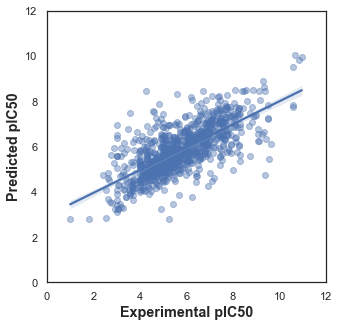

[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=50, objective=regression; total time=   0.3s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=70, objective=regression; total time=   0.3s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=100, objective=regression; total time=   0.3s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=50, objective=regression; total time=   0.5s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=70, objective=regression; total time=   0.6s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=100, objective=regression; total time=   0.8s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=200, num_leaves=50, objective=regression; total time=   1.4s
[CV] END boosting_type=dart, learning_rate=0.001, metric

[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=20, objective=regression; total time=   0.2s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=70, objective=regression; total time=   0.3s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=100, objective=regression; total time=   0.3s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=20, objective=regression; total time=   0.3s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=70, objective=regression; total time=   0.7s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=100, objective=regression; total time=   0.7s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=200, num_leaves=20, objective=regression; total time=   0.9s
[CV] END boosting_type=dart, learning_rate=0.001, metric

[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=20, objective=regression; total time=   0.2s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=70, objective=regression; total time=   0.2s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=80, objective=regression; total time=   0.3s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=20, objective=regression; total time=   0.3s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=70, objective=regression; total time=   0.6s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=80, objective=regression; total time=   0.7s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=200, num_leaves=20, objective=regression; total time=   1.0s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l

[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=50, objective=regression; total time=   0.3s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=70, objective=regression; total time=   0.3s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=100, objective=regression; total time=   0.3s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=50, objective=regression; total time=   0.5s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=70, objective=regression; total time=   0.6s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=100, objective=regression; total time=   0.7s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=200, num_leaves=20, objective=regression; total time=   0.9s
[CV] END boosting_type=dart, learning_rate=0.001, metric

[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=20, objective=regression; total time=   0.2s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=70, objective=regression; total time=   0.2s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=80, objective=regression; total time=   0.3s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=20, objective=regression; total time=   0.3s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=50, objective=regression; total time=   0.5s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=80, objective=regression; total time=   0.7s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=200, num_leaves=20, objective=regression; total time=   0.9s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l

[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=20, objective=regression; total time=   0.2s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=50, objective=regression; total time=   0.2s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=80, objective=regression; total time=   0.3s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=20, objective=regression; total time=   0.3s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=50, objective=regression; total time=   0.5s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=80, objective=regression; total time=   0.7s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=100, objective=regression; total time=   0.7s
[CV] END boosting_type=dart, learning_rate=0.001, metric=

[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=20, objective=regression; total time=   0.2s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=50, objective=regression; total time=   0.2s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=80, objective=regression; total time=   0.3s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=100, objective=regression; total time=   0.3s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=50, objective=regression; total time=   0.5s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=80, objective=regression; total time=   0.6s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=100, objective=regression; total time=   0.7s
[CV] END boosting_type=dart, learning_rate=0.001, metric=

[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=50, objective=regression; total time=   0.2s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=80, objective=regression; total time=   0.3s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=50, num_leaves=100, objective=regression; total time=   0.3s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=20, objective=regression; total time=   0.3s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=70, objective=regression; total time=   0.7s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=100, num_leaves=80, objective=regression; total time=   0.7s
[CV] END boosting_type=dart, learning_rate=0.001, metric=l2, n_estimators=200, num_leaves=20, objective=regression; total time=   1.0s
[CV] END boosting_type=dart, learning_rate=0.001, metric=

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

## **7. Save and load the model**

In [168]:
import pickle
pickle.dump(myGPR, open('Saved_GPR_model', 'wb'))

In [169]:
loaded_model = pickle.load(open('Saved_GPR_model', 'rb'))
result = loaded_model.score(X_test, Y_test)
result

0.4940452920872076